<a href="https://colab.research.google.com/github/KOLIPAKA-VENKATA-AMARNATH/LDA_Lab_assignment/blob/main/LDA_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Loading and Preparing Data
Training set size: (124, 13), Test set size: (54, 13)

Step 2: Training Models

Step 3: Evaluating Models

Evaluation Results for LDA:
Accuracy: 1.0000
Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000

Confusion Matrix:
 [[19  0  0]
 [ 0 21  0]
 [ 0  0 14]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54


Evaluation Results for Logistic Regression:
Accuracy: 0.9815
Precision: 0.9827, Recall: 0.9815, F1 Score: 0.9816

Confusion Matrix:
 [[19  0  0]
 [ 0 20  1]
 [ 0  0 14]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


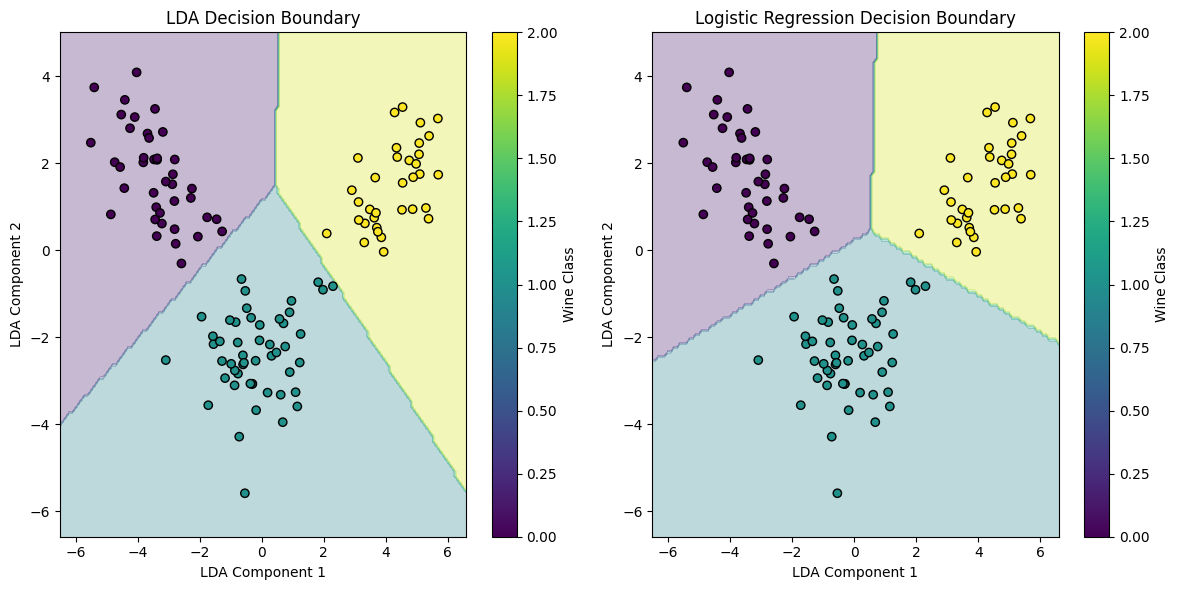


Step 5: Model Comparison Summary
1. Model Performance Metrics:
   - LDA Accuracy: 1.0000
   - Logistic Regression Accuracy: 0.9815

2. Characteristics:
   - LDA assumes normally distributed classes with equal covariance.
   - Logistic Regression is distribution-agnostic.

3. Interpretability:
   - LDA provides insight through class separation.
   - Logistic Regression offers coefficient-based feature importance.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, classification_report

def lda_vs_logistic_regression():
    # Step 1: Load and Prepare Data
    print("Step 1: Loading and Preparing Data")
    wine_data = load_wine()
    X, y = wine_data.data, wine_data.target

    # Splitting into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Standardizing features
    scaler = StandardScaler()
    X_train_std = scaler.fit_transform(X_train)
    X_test_std = scaler.transform(X_test)
    print(f"Training set size: {X_train_std.shape}, Test set size: {X_test_std.shape}")

    # Step 2: Train LDA and Logistic Regression models
    print("\nStep 2: Training Models")
    lda_model = LinearDiscriminantAnalysis()
    lda_model.fit(X_train_std, y_train)

    log_reg_model = LogisticRegression(multi_class='multinomial', max_iter=1000)
    log_reg_model.fit(X_train_std, y_train)

    # Step 3: Evaluation Function
    def evaluate_model(model, X, y_true, model_name):
        y_pred = model.predict(X)
        accuracy = accuracy_score(y_true, y_pred)
        precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')

        print(f"\nEvaluation Results for {model_name}:")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")
        print("\nConfusion Matrix:\n", confusion_matrix(y_true, y_pred))
        print("\nClassification Report:\n", classification_report(y_true, y_pred))

        return accuracy, precision, recall, f1

    print("\nStep 3: Evaluating Models")
    lda_results = evaluate_model(lda_model, X_test_std, y_test, "LDA")
    log_reg_results = evaluate_model(log_reg_model, X_test_std, y_test, "Logistic Regression")

    # Step 4: Plot Decision Boundaries (using 2D transformation)
    def plot_decision_boundaries(X, y, models, titles):
        lda_visualizer = LinearDiscriminantAnalysis(n_components=2)
        X_2d = lda_visualizer.fit_transform(X, y)

        x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
        y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

        plt.figure(figsize=(12, 6))

        for idx, (model, title) in enumerate(zip(models, titles)):
            plt.subplot(1, 2, idx + 1)
            model_for_plot = model.__class__()  # Refit on the 2D transformed data
            model_for_plot.fit(X_2d, y)

            Z = model_for_plot.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            plt.contourf(xx, yy, Z, alpha=0.3)

            scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap='viridis', edgecolor='k')
            plt.colorbar(scatter, label='Wine Class')
            plt.title(f"{title} Decision Boundary")
            plt.xlabel("LDA Component 1")
            plt.ylabel("LDA Component 2")

        plt.tight_layout()
        plt.show()

    print("\nStep 4: Plotting Decision Boundaries")
    plot_decision_boundaries(X_train_std, y_train, [lda_model, log_reg_model], ["LDA", "Logistic Regression"])

    # Step 5: Comparing the Models
    print("\nStep 5: Model Comparison Summary")
    print("1. Model Performance Metrics:")
    print(f"   - LDA Accuracy: {lda_results[0]:.4f}")
    print(f"   - Logistic Regression Accuracy: {log_reg_results[0]:.4f}")
    print("\n2. Characteristics:")
    print("   - LDA assumes normally distributed classes with equal covariance.")
    print("   - Logistic Regression is distribution-agnostic.")
    print("\n3. Interpretability:")
    print("   - LDA provides insight through class separation.")
    print("   - Logistic Regression offers coefficient-based feature importance.")

if __name__ == "__main__":
    lda_vs_logistic_regression()
